In [2]:
from data_processor import *
from global_variables import *
import matplotlib.pyplot as plt
if not os.path.exists('pics/'):
    os.makedirs('pics/')

# --------------------------------WEATHER--------------------------------

## A City's Weather's Proportion in A Whole Year¶

In [54]:
# Parameter
city = 'KSAN'
year = 2018
fname = 'pics/{}/weather/y{}_pie.jpg'.format(city,year)

# Code
if not os.path.exists('pics/{}/weather/'.format(city)):
    os.makedirs('pics/{}/weather/'.format(city))
year_start, year_end = get_yearly_start_end(year=year)
weather_info = get_info(city, year_start, year_end, info_type='weather')

keys = weather_info.index.tolist()
values = weather_info.days.tolist()
kv_map = dict([(list(weather_color_refer.keys())[i], 0) for i in range(len(weather_color_refer.keys()))])
for i in range(len(keys)):
    kv_map[keys[i]] = values[i]
new_map = {'sunny':kv_map['mostlysunny']+kv_map['partlysunny'],
           'clear':kv_map['clear'],
           'cloudy':kv_map['cloudy']+kv_map['mostlycloudy']+kv_map['partlycloudy'],
           'rain':kv_map['rain'],
           ''}
print(kv_map)

The weather information of San Diego during 20180101-20181231 :
Total days: 365
              days  percentage
icon                          
partlysunny    102    0.279452
partlycloudy    96    0.263014
mostlysunny     53    0.145205
rain            39    0.106849
mostlycloudy    29    0.079452
hazy            18    0.049315
clear           15    0.041096
cloudy          11    0.030137
tstorms          2    0.005479
{'mostlysunny': 53, 'partlysunny': 102, 'cloudy': 11, 'mostlycloudy': 29, 'partlycloudy': 96, 'rain': 39, 'clear': 15, 'hazy': 18, 'tstorms': 2}


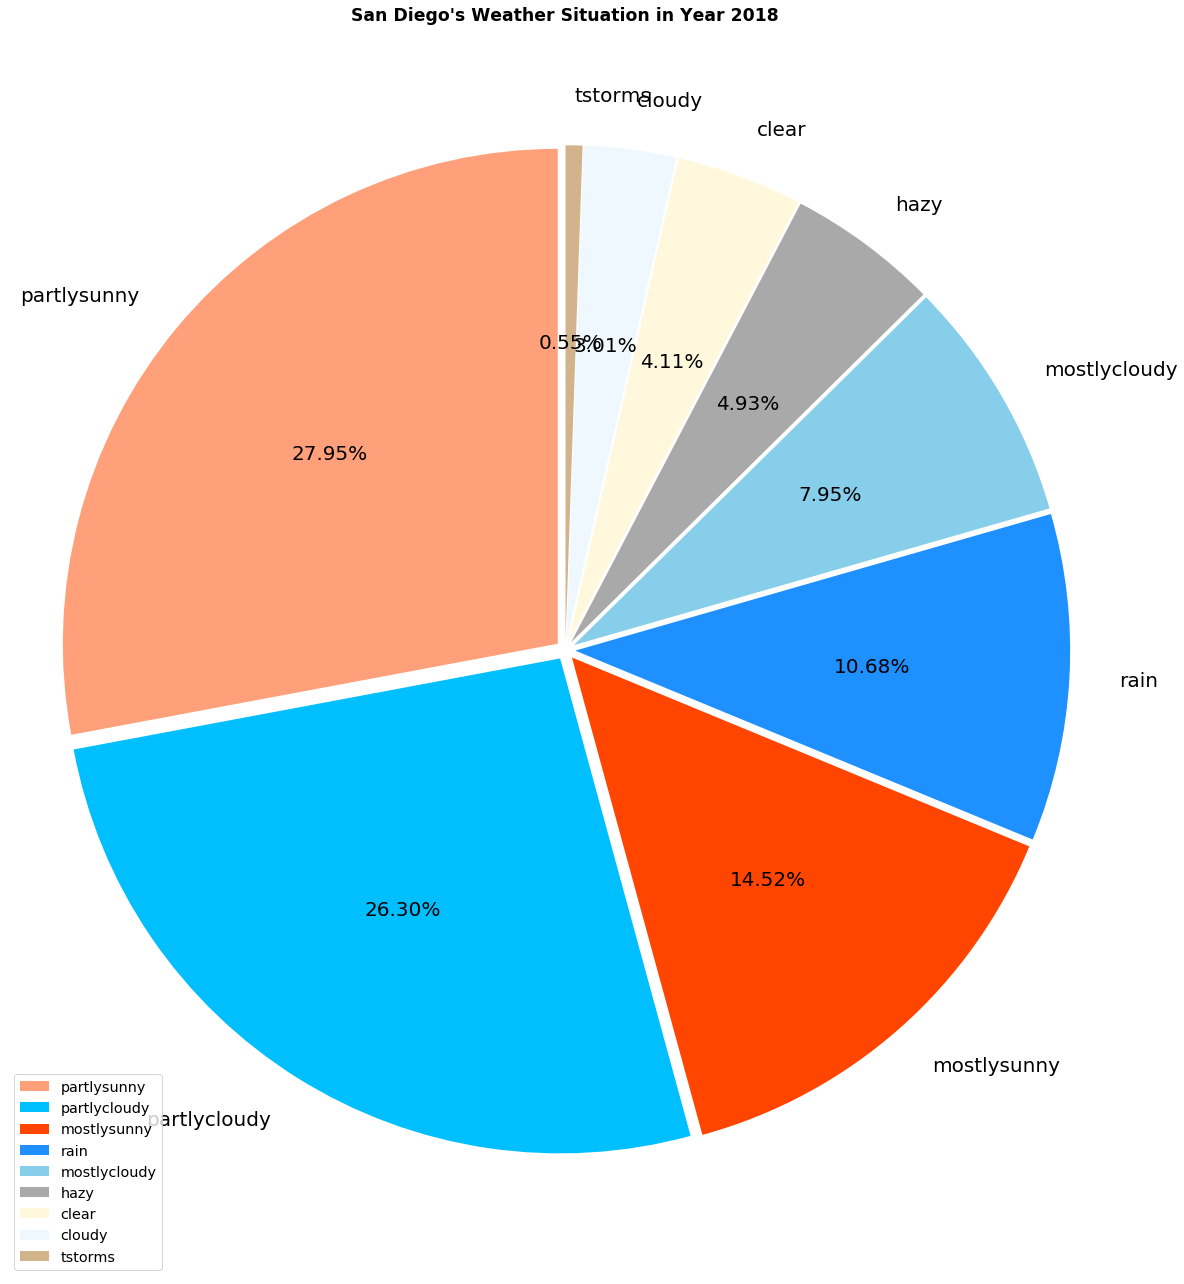

In [44]:
# Plot
plt.figure(figsize=(20,23))
color_list = list(weather_color_refer[k] for k in keys)
patches,label_text,percent_text = plt.pie(values,
                                          explode= tuple([0.02]*len(keys)),
                                          labels=keys,
                                          colors=color_list,
                                          autopct = '%3.2f%%', #digits
                                          shadow = False, #No Shadow
                                          startangle =90, #reverse start angle
                                          pctdistance = 0.6) #数值距圆心半径倍数距离
plt.axis('equal')
plt.legend(loc='lower left',fontsize='x-large')
for t in label_text:
    t.set_size(20)
for t in percent_text:
    t.set_size(20)
title_str = '{}\'s Weather Situation in Year {}'.format(code_city_refer[city], year)
plt.title(title_str,fontsize='xx-large',fontweight='bold')
#plt.savefig(fname)
plt.show()

## A City's Weather Proportion of a Specific Month¶

The weather information of San Diego during 20190301-20190331 :
Total days: 31
              days  percentage
icon                          
rain            10    0.322581
partlysunny      9    0.290323
partlycloudy     4    0.129032
clear            3    0.096774
mostlysunny      3    0.096774
mostlycloudy     1    0.032258
tstorms          1    0.032258


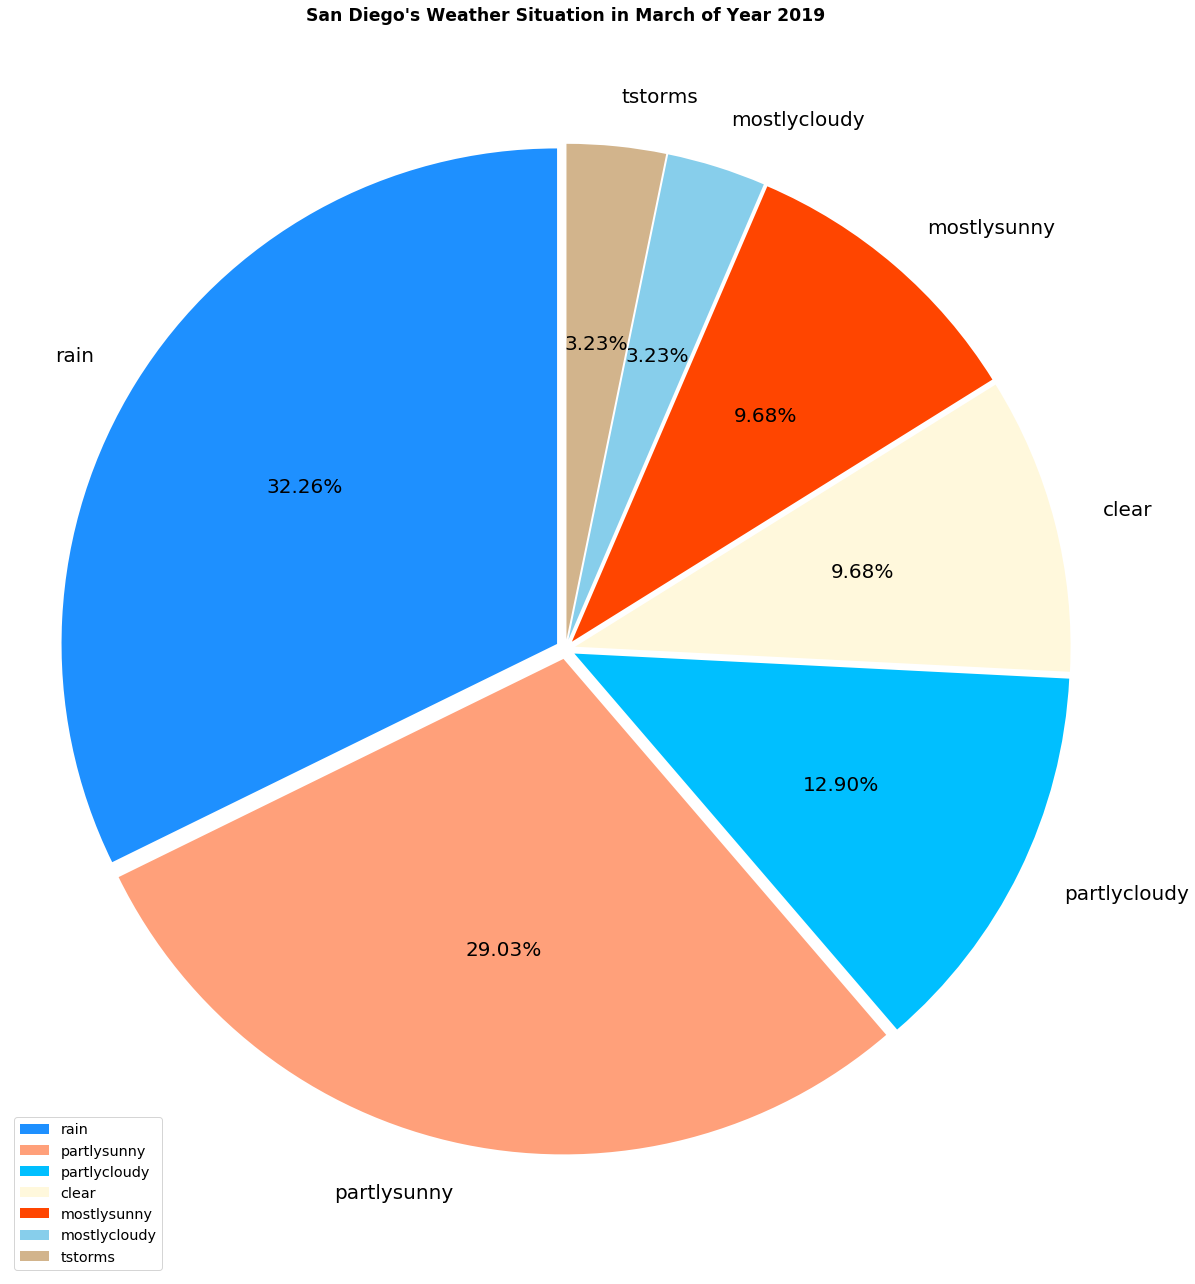

In [4]:
# Parameter
city = 'KSAN'
year = 2019
month = 3
fname = 'pics/{}/weather/y{}_m{}_pie.jpg'.format(city,year,month)

# Code
if not os.path.exists('pics/{}/weather/'.format(city)):
    os.makedirs('pics/{}/weather/'.format(city))
month_start, month_end = get_monthly_start_end(year=year, month=month)
weather_info = get_info(city,month_start, month_end, info_type='weather')
keys = weather_info.index.tolist()
values = weather_info.days.tolist()

# Plot
plt.figure(figsize=(20,23))
color_list = list(weather_color_refer[k] for k in keys)
patches,label_text,percent_text = plt.pie(values,
                                          explode= tuple([0.02]*len(keys)),
                                          labels=keys,
                                          colors=color_list,
                                          autopct = '%3.2f%%', #digits
                                          shadow = False, #No Shadow
                                          startangle =90, #reverse start angle
                                          pctdistance = 0.6) #数值距圆心半径倍数距离
plt.axis('equal')
plt.legend(loc='lower left',fontsize='x-large')
for t in label_text:
    t.set_size(20)
for t in percent_text:
    t.set_size(20)
#plt.savefig(fname)
title_str = '{}\'s Weather Situation in {} of Year {}'.format(code_city_refer[city], get_month_str(month), year)
plt.title(title_str,fontsize='xx-large',fontweight='bold')
#plt.savefig(fname)
plt.show()

## A City's Monthly Weather Plot of a Whole Year

{'mostlysunny': [6, 5, 2, 6, 2, 3, 3, 5, 4, 3, 7, 7], 'partlysunny': [6, 2, 9, 9, 11, 9, 13, 9, 10, 13, 8, 3], 'cloudy': [0, 0, 0, 2, 4, 3, 0, 0, 2, 0, 0, 0], 'mostlycloudy': [2, 1, 2, 4, 4, 6, 4, 1, 3, 1, 0, 1], 'partlycloudy': [6, 9, 6, 6, 3, 8, 11, 15, 10, 4, 9, 9], 'rain': [4, 5, 10, 2, 7, 0, 0, 1, 1, 1, 3, 5], 'clear': [2, 2, 1, 1, 0, 1, 0, 0, 0, 5, 2, 1], 'hazy': [5, 4, 1, 0, 0, 0, 0, 0, 0, 3, 1, 4], 'tstorms': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]}


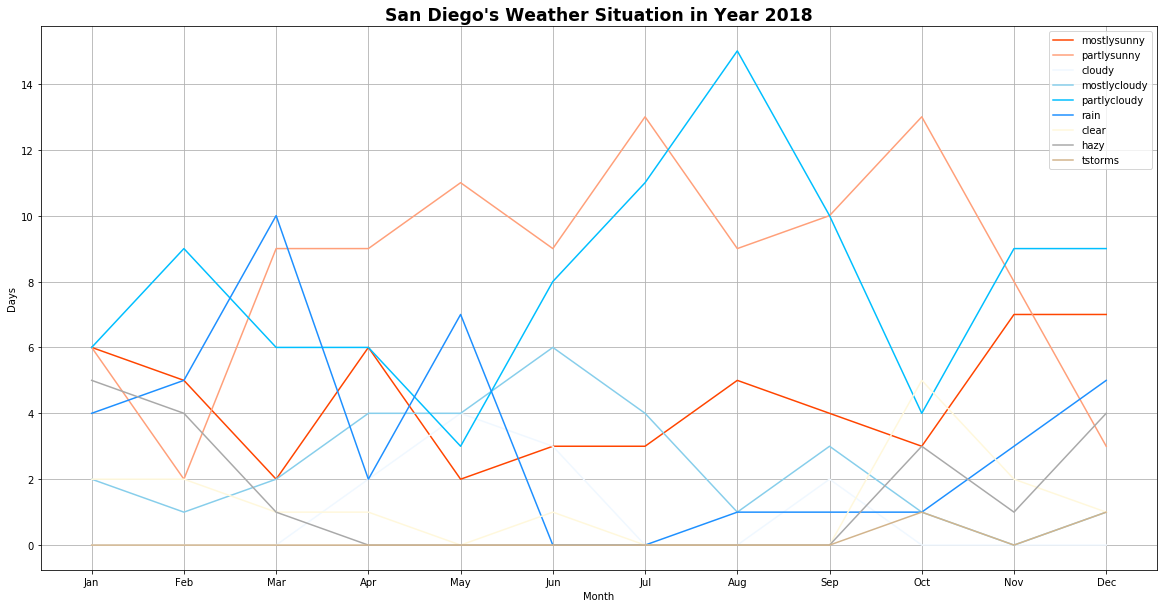

In [5]:
# Parameter
city = 'KSAN'
year = 2018
fname = 'pics/{}_icon_y{}_plot.jpg'.format(city,year)

# Code
if not os.path.exists('pics/{}/weather/'.format(city)):
    os.makedirs('pics/{}/weather/'.format(city))
icon_days_dict = dict([(key,[]) for key in weather_color_refer.keys()])
for month in range(1,13):
    month_start, month_end = get_monthly_start_end(year=year, month=month)
    weather_info = get_info(city,month_start, month_end, info_type='weather', output=False)
    for key in weather_color_refer.keys():
            try:
                icon_days_dict[key].append(weather_info['days'][key])
            except :
                icon_days_dict[key].append(0)
print(icon_days_dict)

# Plot
plt.figure(figsize=(20,10))
for key in weather_color_refer.keys():
    plt.plot(range(12), icon_days_dict[key], color=weather_color_refer[key])
title_str = '{}\'s Weather Situation in Year {}'.format(code_city_refer[city], year)
plt.xlabel('Month')
plt.xticks(range(12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Days')
plt.legend(list([key for key in weather_color_refer.keys()]))
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.grid()
plt.show()

# --------------------------------TEMPERATURE--------------------------------


## A City's Monthly Average Temperature of a Whole Year¶

[61.70967741935484, 59.642857142857146, 61.064516129032256, 63.8, 63.87096774193548, 67.76666666666667, 75.2258064516129, 78.35483870967742, 72.13333333333334, 69.45161290322581, 65.83333333333333, 59.483870967741936]
[66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342, 66.57534246575342]


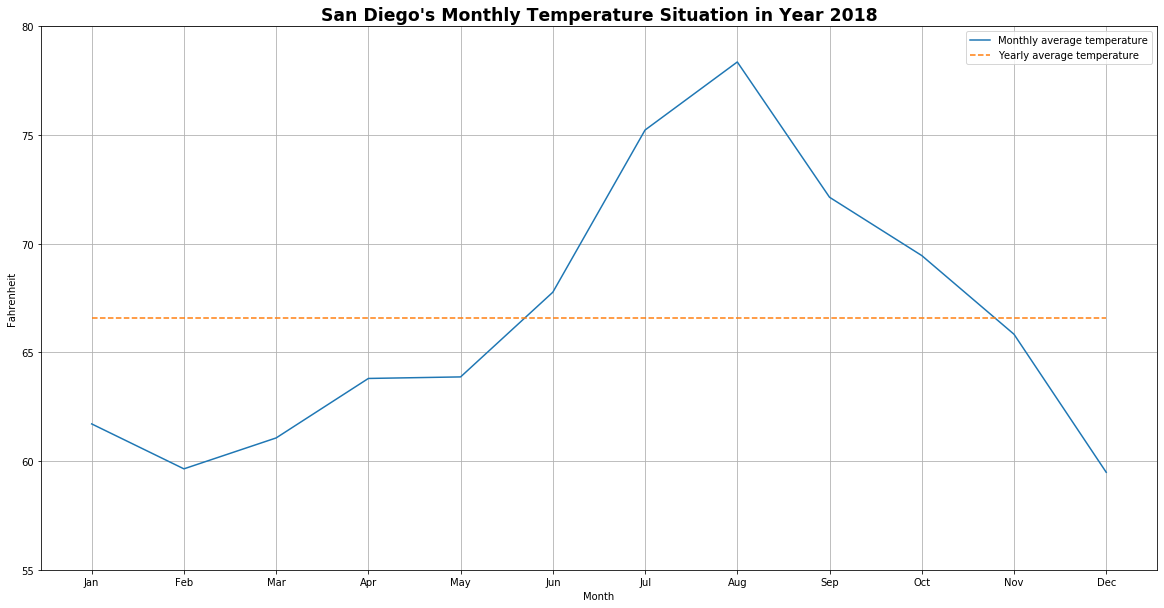

In [6]:
# Parameter
city = 'KSAN'
year = 2018
fname = 'pics/{}/temperature/y{}_plot.jpg'.format(city,year)

# Code
if not os.path.exists('pics/{}/temperature/'.format(city)):
    os.makedirs('pics/{}/temperature/'.format(city))
monthly_avg_temp_list = []
for month in range(1,13):
    month_start, month_end = get_monthly_start_end(year=year, month=month)
    weather_info = get_info(city,month_start, month_end, info_type='temperature', output=False)
    monthly_avg_temp_list.append(weather_info['mean'])
print(monthly_avg_temp_list)
year_start, year_end = get_yearly_start_end(year=year)
weather_info = get_info(city,year_start, year_end, info_type='temperature', output=False)
yearly_avg_temp_list = list([weather_info['mean'] for i in range(12)])
print(yearly_avg_temp_list)

# Plot
plt.figure(figsize=(20,10))
plt.plot(range(12), monthly_avg_temp_list)
plt.plot(range(12), yearly_avg_temp_list, '--')
title_str = '{}\'s Monthly Temperature Situation in Year {}'.format(code_city_refer[city], year)
plt.xlabel('Month')
plt.xticks(range(12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Fahrenheit')
plt.ylim([55,80])
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.legend(['Monthly average temperature','Yearly average temperature'])
plt.grid()
#plt.savefig(fname)
plt.show()

## A City's Average Temperature of a Specific Month in All Years (1990 - 2019)

[58.225806451612904, 56.32258064516129, 59.87096774193548, 60.87096774193548, 60.12903225806452, 60.096774193548384, 59.58064516129032, 61.25806451612903, 59.03225806451613, 57.935483870967744, 57.645161290322584, 58.54838709677419, 57.193548387096776, 59.774193548387096, 62.193548387096776, 60.354838709677416, 57.16129032258065, 60.193548387096776, 59.16129032258065, 59.74193548387097, 60.61290322580645, 61.096774193548384, 58.516129032258064, 60.354838709677416, 64.41935483870968, 66.45161290322581, 63.0, 62.935483870967744, 61.064516129032256, 60.87096774193548]


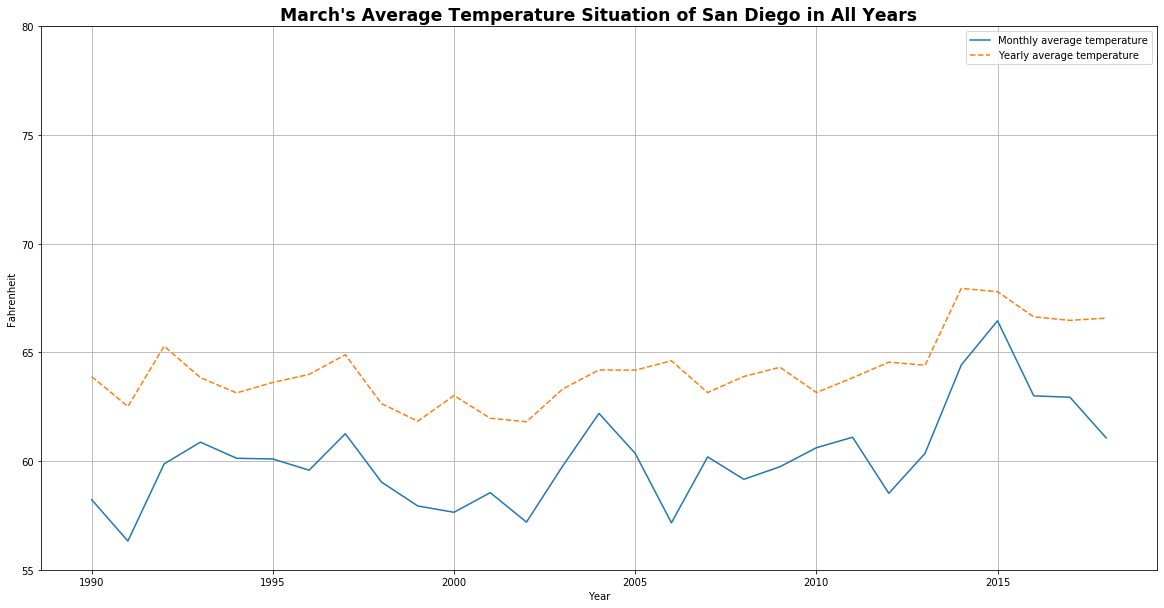

In [7]:
# Parameter
city = 'KSAN'
month = 3
fname = 'pics/{}/temperature/m{}_plot.jpg'.format(city,month)

# Code
if not os.path.exists('pics/{}/temperature/'.format(city)):
    os.makedirs('pics/{}/temperature/'.format(city))
start_year = 1990
end_year = 2019
if month > 4:
    end_year = 2018
monthly_avg_temp_list = []
yearly_avg_temp_list = []
for year in range(start_year, end_year + 1):
    month_start, month_end = get_monthly_start_end(year=year, month=month)
    weather_info = get_info(city,month_start, month_end, info_type='temperature', output=False)
    monthly_avg_temp_list.append(weather_info['mean'])
    year_start, year_end = get_yearly_start_end(year=year)
    weather_info = get_info(city,year_start, year_end, info_type='temperature', output=False)
    yearly_avg_temp_list.append(weather_info['mean'])
print(monthly_avg_temp_list)

# plot
plt.figure(figsize=(20,10))
plt.plot(range(start_year, end_year), monthly_avg_temp_list[:-1])
plt.plot(range(start_year, end_year), yearly_avg_temp_list[:-1], '--')
title_str = '{}\'s Average Temperature Situation of {} in All Years'.format(get_month_str(month), code_city_refer[city])
plt.xlabel('Year')
plt.ylim([1990,2019])
plt.ylabel('Fahrenheit')
plt.ylim([55,80])
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.legend(['Monthly average temperature','Yearly average temperature'])
plt.grid()
# plt.savefig(fname)
plt.show()

## A City's Yearly Average Temperature in All Years (1990 - 2018)

[63.88767123287671, 62.50958904109589, 65.28688524590164, 63.83561643835616, 63.134246575342466, 63.61643835616438, 63.986338797814206, 64.89041095890411, 62.64109589041096, 61.83561643835616, 63.01639344262295, 61.96986301369863, 61.80821917808219, 63.31506849315068, 64.19125683060109, 64.18082191780822, 64.61369863013698, 63.15068493150685, 63.89071038251366, 64.31506849315069, 63.153424657534245, 63.827397260273976, 64.54918032786885, 64.40821917808219, 67.93972602739726, 67.79178082191781, 66.6311475409836, 66.47123287671234, 66.57534246575342, 60.25833333333333]


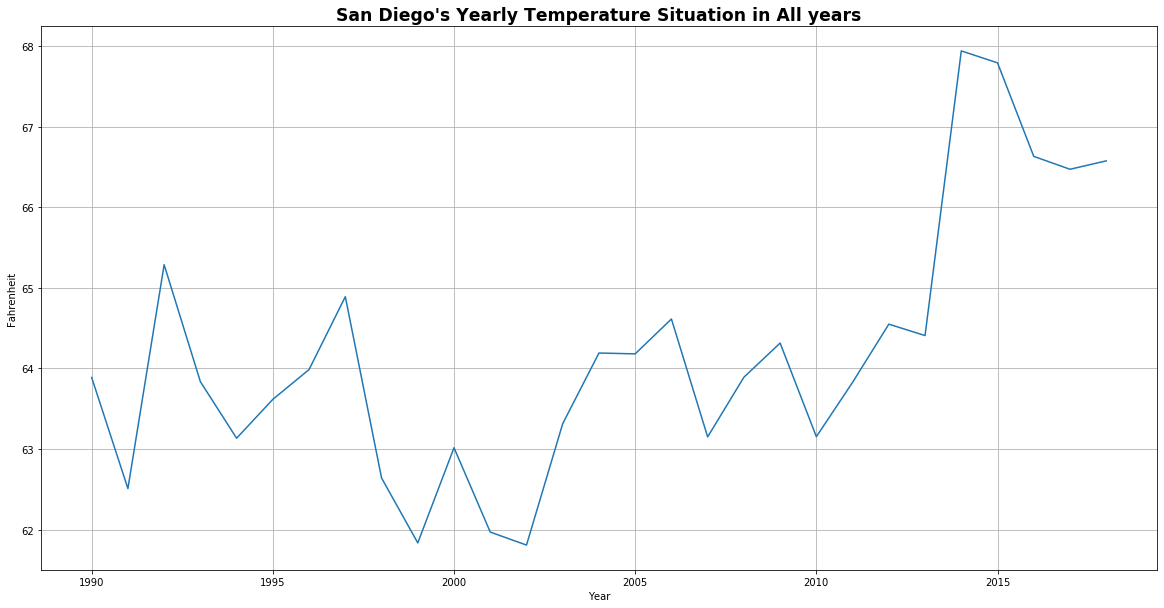

In [8]:
# Parameter
city = 'KSAN'
fname = 'pics/{}/temperature/all_plot.jpg'.format(city,month)

# Code
if not os.path.exists('pics/{}/temperature/'.format(city)):
    os.makedirs('pics/{}/temperature/'.format(city))
start_year = 1990
end_year = 2019
yearly_avg_temp_list = []
for year in range(start_year, end_year + 1):
    year_start, year_end = get_yearly_start_end(year=year)
    weather_info = get_info(city,year_start, year_end, info_type='temperature', output=False)
    yearly_avg_temp_list.append(weather_info['mean'])
print(yearly_avg_temp_list)

# plot
plt.figure(figsize=(20,10))
plt.plot(range(start_year, end_year), yearly_avg_temp_list[:-1])
title_str = '{}\'s Yearly Temperature Situation in All years'.format(code_city_refer[city])
plt.xlabel('Year')
plt.ylabel('Fahrenheit')
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.grid()
plt.savefig(fname)
plt.show()

# --------------------------------PRECIPITATION--------------------------------

## A City's Monthly Average Precipitation of a Whole Year

[0.057096774193548396, 0.012500000000000015, 0.020967741935483893, 0.0006666666666666666, 0.0029032258064516383, 9.999999999999999e-18, 0.0, 0.0006451612903225806, 3.3333333333333333e-18, 0.01838709677419356, 0.023000000000000003, 0.026774193548387098]
[0.013671232876712337, 0.013671232876712337, 0.013671232876712337, 0.013671232876712337, 0.013671232876712337, 0.013671232876712337, 0.013671232876712337, 0.013671232876712337, 0.013671232876712337, 0.013671232876712337, 0.013671232876712337, 0.013671232876712337]


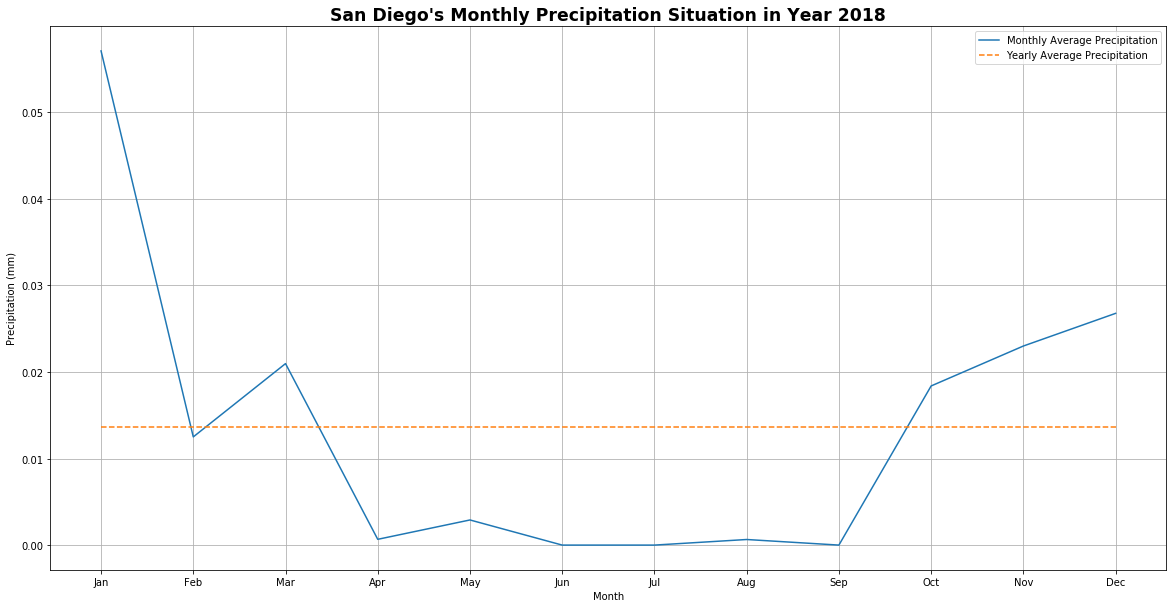

In [9]:
# Parameter
city = 'KSAN'
year = 2018
fname = 'pics/{}/precipitation/y{}_plot.jpg'.format(city,year)

# Code
if not os.path.exists('pics/{}/precipitation/'.format(city)):
    os.makedirs('pics/{}/precipitation/'.format(city))
monthly_avg_precip_list = []
for month in range(1,13):
    month_start, month_end = get_monthly_start_end(year=year, month=month)
    weather_info = get_info(city,month_start, month_end, info_type='precipitation', output=False)
    monthly_avg_precip_list.append(weather_info['mean'])
print(monthly_avg_precip_list)
year_start, year_end = get_yearly_start_end(year=year)
weather_info = get_info(city,year_start, year_end, info_type='precipitation', output=False)
yearly_avg_precip_list = list([weather_info['mean'] for i in range(12)])
print(yearly_avg_precip_list)

# Plot
plt.figure(figsize=(20,10))
plt.plot(range(12), monthly_avg_precip_list)
plt.plot(range(12), yearly_avg_precip_list, '--')
title_str = '{}\'s Monthly Precipitation Situation in Year {}'.format(code_city_refer[city], year)
plt.xlabel('Month')
plt.xticks(range(12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Precipitation (mm)')
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.legend(['Monthly Average Precipitation','Yearly Average Precipitation'])
plt.grid()
plt.show()

## A City's Average Preicipitation of a Specific Month in All Years (1990 - 2019)

[2.306774193548387, 2.509032258064517, 1.7796774193548388, 0.24903225806451615, 0.13516129032258062, 0.32774193548387104, 0.2812903225806451, 0.0, 0.07129032258064516, 0.035483870967741936, 0.034193548387096775, 0.02032258064516129, 0.014838709677419354, 0.04225806451612903, 0.012903225806451613, 0.06483870967741935, 0.043870967741935496, 0.0029032258064516257, 0.00838709677419356, 0.00580645161290323, 0.021935483870967755, 0.04483870967741937, 0.020967741935483886, 0.027096774193548393, 0.027096774193548393, 0.02870967741935484, 0.010322580645161297, 0.0025806451612903226, 0.020967741935483893, 0.03935483870967744]


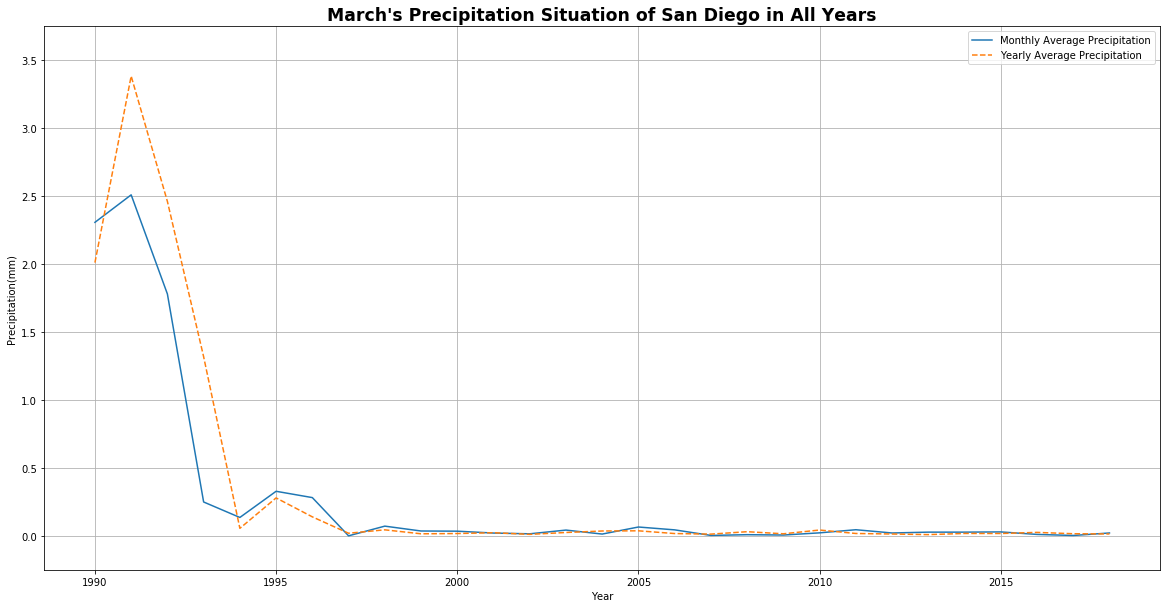

In [10]:
# Parameter
city = 'KSAN'
month = 3
fname = 'pics/{}/precipitation/m{}_plot.jpg'.format(city, month)

# Code
if not os.path.exists('pics/{}/precipitation/'.format(city)):
    os.makedirs('pics/{}/precipitation/'.format(city))
start_year = 1990
end_year = 2019
if month > 4:
    end_year = 2018
monthly_avg_precip_list = []
yearly_avg_precip_list = []
for year in range(start_year, end_year + 1):
    month_start, month_end = get_monthly_start_end(year=year, month=month)
    weather_info = get_info(city,month_start, month_end, info_type='precipitation', output=False)
    monthly_avg_precip_list.append(weather_info['mean'])
    year_start, year_end = get_yearly_start_end(year=year)
    weather_info = get_info(city,year_start, year_end, info_type='precipitation', output=False)
    yearly_avg_precip_list.append(weather_info['mean'])
print(monthly_avg_precip_list)

# plot
plt.figure(figsize=(20,10))
plt.plot(range(start_year, end_year), monthly_avg_precip_list[:-1])
plt.plot(range(start_year, end_year), yearly_avg_precip_list[:-1], '--')
title_str = '{}\'s Precipitation Situation of {} in All Years'.format(get_month_str(month),code_city_refer[city])
plt.xlabel('Year')
plt.ylabel('Precipitation(mm)')
plt.ylim([-0.25,3.75])
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.legend(['Monthly Average Precipitation','Yearly Average Precipitation'])
plt.grid()
plt.show()

## A City's Yearly Precipitation in All Years (1990 - 2018)

[733.7699999999999, 1234.8100000000002, 900.5800000000002, 481.03000000000003, 20.12, 101.82, 51.10000000000001, 6.970000000000001, 16.09, 5.440000000000001, 6.19, 8.340000000000002, 3.9300000000000006, 8.94, 13.009999999999998, 13.460000000000003, 6.1300000000000034, 4.570000000000002, 11.110000000000003, 5.490000000000002, 15.570000000000002, 6.310000000000002, 4.920000000000003, 3.260000000000001, 6.3900000000000015, 6.240000000000003, 9.260000000000003, 5.6300000000000034, 4.990000000000003, 5.920000000000002]


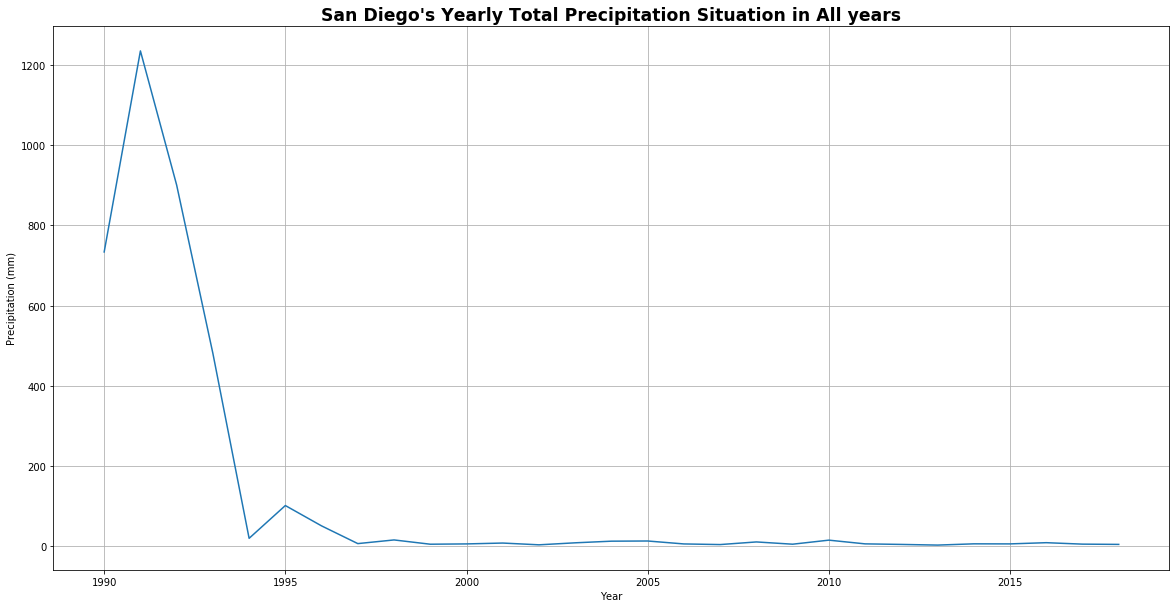

In [11]:
# Parameter
city = 'KSAN'
fname = 'pics/{}/precipitation/all_plot.jpg'.format(city)

# Code
if not os.path.exists('pics/{}/precipitation/'.format(city)):
    os.makedirs('pics/{}/precipitation/'.format(city))
start_year = 1990
end_year = 2019
yearly_all_precip_list = []
for year in range(start_year, end_year + 1):
    year_start, year_end = get_yearly_start_end(year=year)
    weather_info = get_info(city,year_start, year_end, info_type='precipitation', output=False)
    yearly_all_precip_list.append(weather_info['mean']*weather_info['count'])
print(yearly_all_precip_list)

# plot
plt.figure(figsize=(20,10))
plt.plot(range(start_year, end_year), yearly_all_precip_list[:-1])
title_str = '{}\'s Yearly Total Precipitation Situation in All years'.format(code_city_refer[city])
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.grid()
#plt.savefig(fname)
plt.show()

# --------------------------------COMPARISON-------------------------------- 

## Yearly Average Temperature Comparison

In [2]:
# Parameter
fname = 'pics/comparison/temperature_plot.jpg'

# Code
if not os.path.exists('pics/comparison/'):
    os.makedirs('pics/comparison/')
start_year = 1990
end_year = 2018
cities_yearly_avg_temp_dict = dict([(city,[]) for city in city_code_refer.values()])
for city in city_code_refer.values():
    for year in range(start_year, end_year + 1):
        year_start, year_end = get_yearly_start_end(year=year)
        weather_info = get_info(city,year_start, year_end, info_type='temperature', output=False)
        cities_yearly_avg_temp_dict[city].append(weather_info['mean'])
print(cities_yearly_avg_temp_dict)
print(code_city_refer)

{'KSEA': [52.25205479452055, 52.68493150684932, 54.21584699453552, 52.12054794520548, 53.37260273972603, 54.33424657534247, 51.650273224043715, 52.38356164383562, 52.78082191780822, 51.131506849315066, 50.797814207650276, 51.00547945205479, 51.33150684931507, 52.85753424657534, 53.16393442622951, 53.00547945205479, 53.221917808219175, 52.31232876712329, 51.67486338797814, 52.43561643835616, 52.97808219178082, 51.31232876712329, 52.53825136612022, 54.04109589041096, 55.35342465753425, 55.88767123287671, 55.33879781420765, 53.50958904109589, 54.97534246575343], 'KSFO': [57.632876712328766, 57.273972602739725, 59.35792349726776, 58.84109589041096, 56.6958904109589, 57.917808219178085, 58.30601092896175, 59.24109589041096, 56.95890410958904, 56.18356164383562, 57.46448087431694, 57.4, 57.66575342465753, 58.26027397260274, 58.83879781420765, 58.74794520547945, 57.69315068493151, 57.71506849315068, 57.80327868852459, 58.37260273972603, 58.85753424657534, 57.205479452054796, 57.83606557377049

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


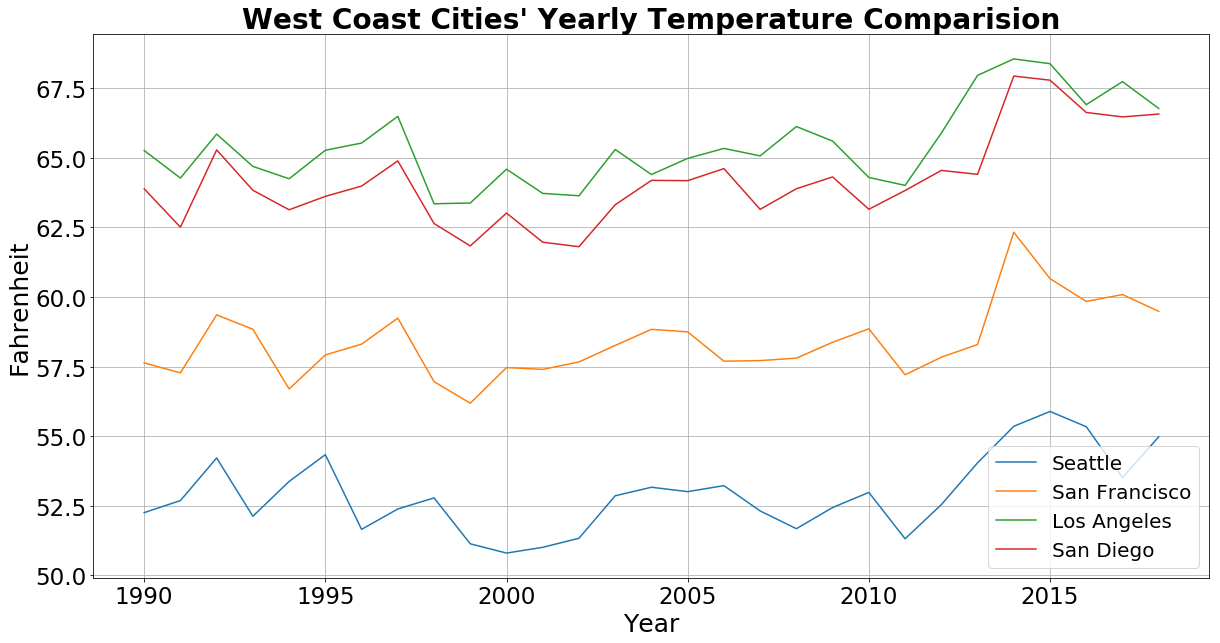

In [17]:
# West cost plot
plt.figure(figsize=(20,10))
for city in list(city_code_refer.values())[0:4]:
    plt.plot(range(start_year, end_year+1), cities_yearly_avg_temp_dict[city])
title_str = 'West Coast Cities\' Yearly Temperature Comparision'
plt.xlabel('Year',{'size':25})
plt.ylabel('Fahrenheit',{'size':25})
plt.tick_params(labelsize=23)
plt.title(title_str,fontsize=28,fontweight='bold')
plt.legend(list(city_code_refer.keys())[0:4],prop={'family':'Times New Roman','weight':'normal','size':20})
plt.grid()
fname = 'pics/comparison/temperature_west_plot.jpg'
plt.savefig(fname)
plt.show()

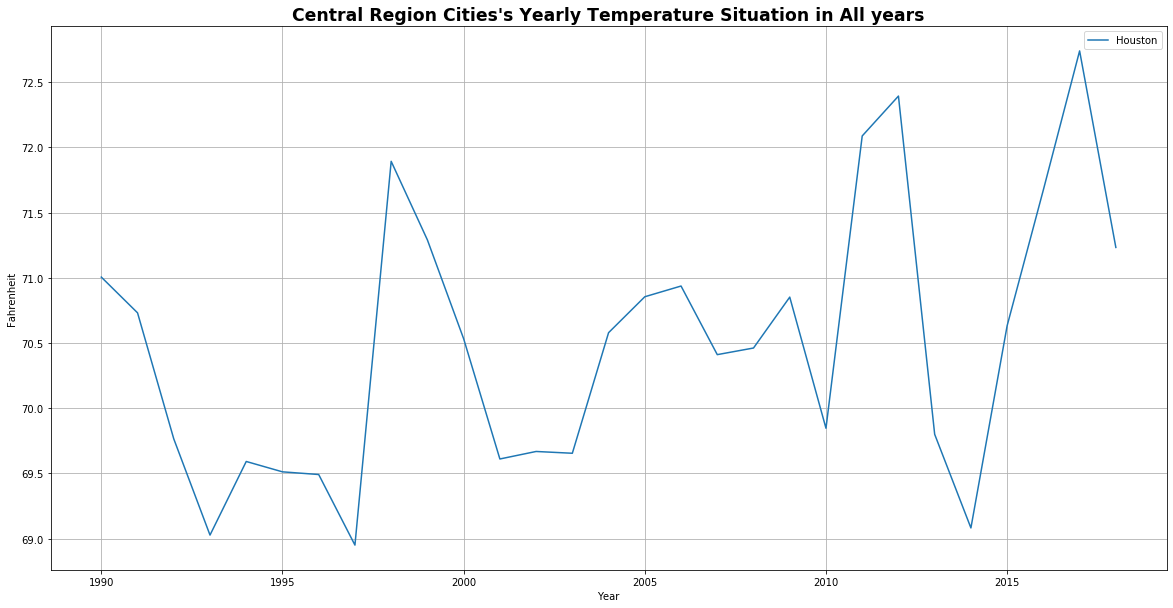

In [29]:
# East cost plot
plt.figure(figsize=(20,10))
for city in list(city_code_refer.values())[4:5]:
    plt.plot(range(start_year, end_year+1), cities_yearly_avg_temp_dict[city])
title_str = 'Central Region Cities\' Yearly Temperature Situation in All years'
plt.xlabel('Year')
plt.ylabel('Fahrenheit')
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.legend(list(city_code_refer.keys())[4:5])
plt.grid()
fname = 'pics/comparison/temperature_central_plot.jpg'
plt.savefig(fname)
plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


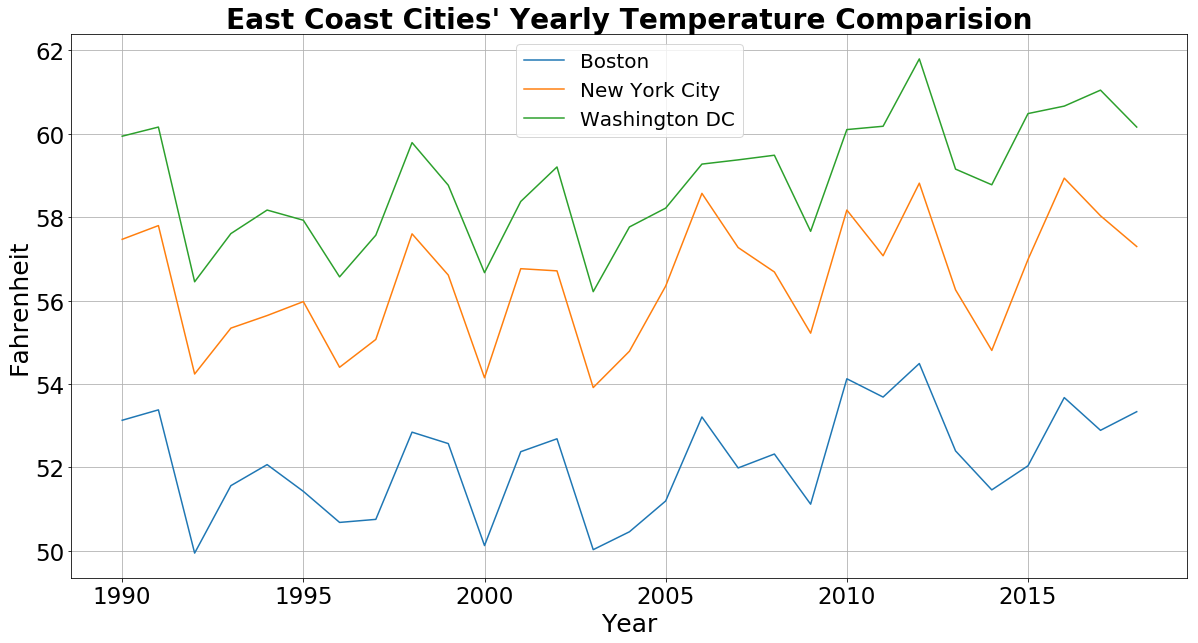

In [19]:
# East plot
plt.figure(figsize=(20,10))
for city in list(city_code_refer.values())[5:]:
    plt.plot(range(start_year, end_year+1), cities_yearly_avg_temp_dict[city])

title_str = 'East Coast Cities\' Yearly Temperature Comparision'
plt.xlabel('Year',{'size':25})
plt.ylabel('Fahrenheit',{'size':25})
plt.tick_params(labelsize=23)
plt.title(title_str,fontsize=28,fontweight='bold')
plt.legend(list(city_code_refer.keys())[5:],prop={'family':'Times New Roman','weight':'normal','size':20})
plt.grid()
fname = 'pics/comparison/temperature_east_plot.jpg'
plt.savefig(fname)
plt.show()

## Yearly Precipitation Comparison

In [3]:
# Parameter
fname = 'pics/comparison/temperature_plot.jpg'

# Code
if not os.path.exists('pics/comparison/'):
    os.makedirs('pics/comparison/')
start_year = 1990
end_year = 2018
cities_yearly_avg_temp_dict = dict([(city,[]) for city in city_code_refer.values()])
for city in city_code_refer.values():
    for year in range(start_year, end_year + 1):
        year_start, year_end = get_yearly_start_end(year=year)
        weather_info = get_info(city,year_start, year_end, info_type='precipitation', output=False)
        cities_yearly_avg_temp_dict[city].append(weather_info['mean'])
print(cities_yearly_avg_temp_dict)
print(code_city_refer)

{'KSEA': [0.11808219178082192, 0.094575342465753415, 0.093306010928961763, 0.083287671232876712, 0.09452054794520548, 0.28317808219178087, 0.20046448087431695, 0.11408219178082192, 0.11224657534246575, 0.1116164383561644, 0.06806010928961749, 0.10123287671232878, 0.085561643835616444, 0.11263013698630137, 0.08363387978142077, 0.096630136986301379, 0.13268493150684932, 0.10673972602739729, 0.083961748633879785, 0.10528767123287673, 0.12873972602739728, 0.099726027397260289, 0.13185792349726777, 0.089205479452054801, 0.1328219178082192, 0.12282191780821917, 0.12333333333333335, 0.12956164383561647, 0.09789041095890412], 'KSFO': [0.028082191780821917, 0.041452054794520549, 0.06726775956284152, 0.062383561643835628, 0.05002739726027397, 0.28227397260273973, 0.17781420765027323, 0.055671232876712329, 0.088602739726027391, 0.04131506849315069, 0.049808743169398907, 0.071671232876712315, 0.053369863013698622, 0.051041095890410955, 0.051912568306010931, 0.073753424657534247, 0.0571232876712328

In [2]:
# West cost plot
plt.figure(figsize=(20,10))
for city in list(city_code_refer.values())[0:4]:
    plt.plot(range(start_year, end_year+1), cities_yearly_avg_temp_dict[city])
title_str = 'West Coast Cities\' Yearly Precipitation Comparision'
plt.xlabel('Year',{'size':25})
plt.ylabel('Precipitation(mm)',{'size':25})
plt.tick_params(labelsize=23)
plt.title(title_str,fontsize=28,fontweight='bold')
plt.legend(list(city_code_refer.keys())[0:4],prop={'family':'Times New Roman','weight':'normal','size':20},loc='upper center')
plt.grid()
fname = 'pics/comparison/precipitation_west_plot.jpg'
plt.savefig(fname)
plt.show()


NameError: name 'plt' is not defined

{'KSEA': [0.09452054794520548, 0.28317808219178087, 0.20046448087431695, 0.11408219178082192, 0.11224657534246575, 0.1116164383561644, 0.06806010928961749, 0.10123287671232878, 0.08556164383561644, 0.11263013698630137, 0.08363387978142077, 0.09663013698630138, 0.13268493150684932, 0.10673972602739729, 0.08396174863387978, 0.10528767123287673, 0.12873972602739728, 0.09972602739726029, 0.13185792349726777, 0.0892054794520548, 0.1328219178082192, 0.12282191780821917, 0.12333333333333335, 0.12956164383561647, 0.09789041095890412], 'KSFO': [0.05002739726027397, 0.28227397260273973, 0.17781420765027323, 0.05567123287671233, 0.08860273972602739, 0.04131506849315069, 0.04980874316939891, 0.07167123287671232, 0.05336986301369862, 0.051041095890410955, 0.05191256830601093, 0.07375342465753425, 0.057123287671232884, 0.03158904109589041, 0.04114754098360656, 0.04506849315068494, 0.06509589041095891, 0.045452054794520545, 0.05866120218579235, 0.009315068493150691, 0.056712328767123295, 0.0228219178

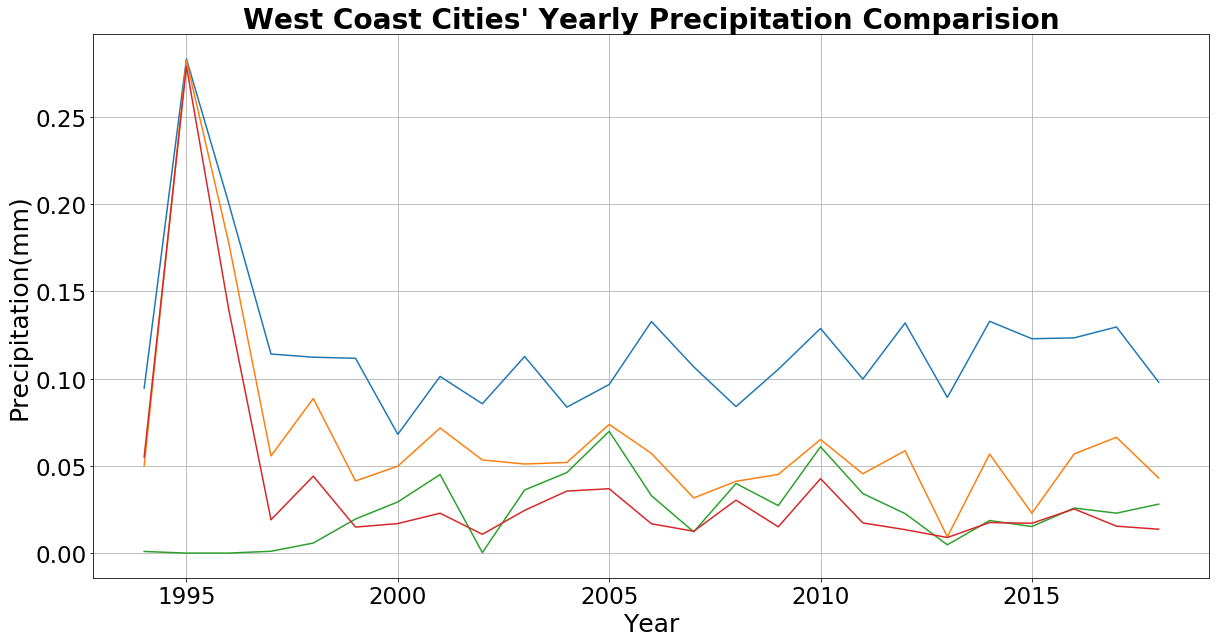

In [29]:
# West cost plot
# Parameter
fname = 'pics/comparison/temperature_plot.jpg'

# Code
if not os.path.exists('pics/comparison/'):
    os.makedirs('pics/comparison/')
start_year = 1994
end_year = 2018
cities_yearly_avg_temp_dict = dict([(city,[]) for city in city_code_refer.values()])
for city in city_code_refer.values():
    for year in range(start_year, end_year + 1):
        year_start, year_end = get_yearly_start_end(year=year)
        weather_info = get_info(city,year_start, year_end, info_type='precipitation', output=False)
        cities_yearly_avg_temp_dict[city].append(weather_info['mean'])
print(cities_yearly_avg_temp_dict)
print(code_city_refer)
plt.figure(figsize=(20,10))
for city in list(city_code_refer.values())[0:4]:
    plt.plot(range(start_year, end_year+1), cities_yearly_avg_temp_dict[city])
title_str = 'West Coast Cities\' Yearly Precipitation Comparision'
plt.xlabel('Year',{'size':25})
plt.ylabel('Precipitation(mm)',{'size':25})
plt.tick_params(labelsize=23)
plt.title(title_str,fontsize=28,fontweight='bold')
# plt.legend(list(city_code_refer.keys())[0:4],prop={'family':'Times New Roman','weight':'normal','size':20},loc='upper center')
plt.grid()
fname = 'pics/comparison/precipitation_west_zoom_plot.jpg'
plt.savefig(fname)
plt.show()

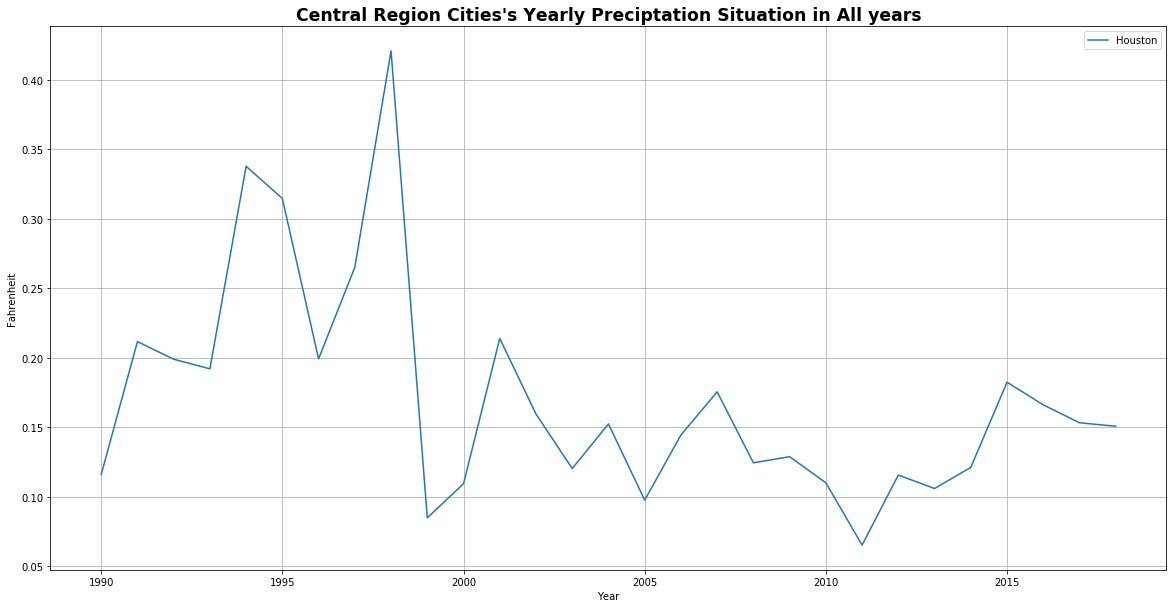

In [35]:
# Central plot
plt.figure(figsize=(20,10))
for city in list(city_code_refer.values())[4:5]:
    plt.plot(range(start_year, end_year+1), cities_yearly_avg_temp_dict[city])
title_str = 'Central Region Cities\'s Yearly Preciptation Situation in All years'
plt.xlabel('Year')
plt.ylabel('Fahrenheit')
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.legend(list(city_code_refer.keys())[4:5])
plt.grid()
fname = 'pics/comparison/precipitation_central_plot.jpg'
plt.savefig(fname)
plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


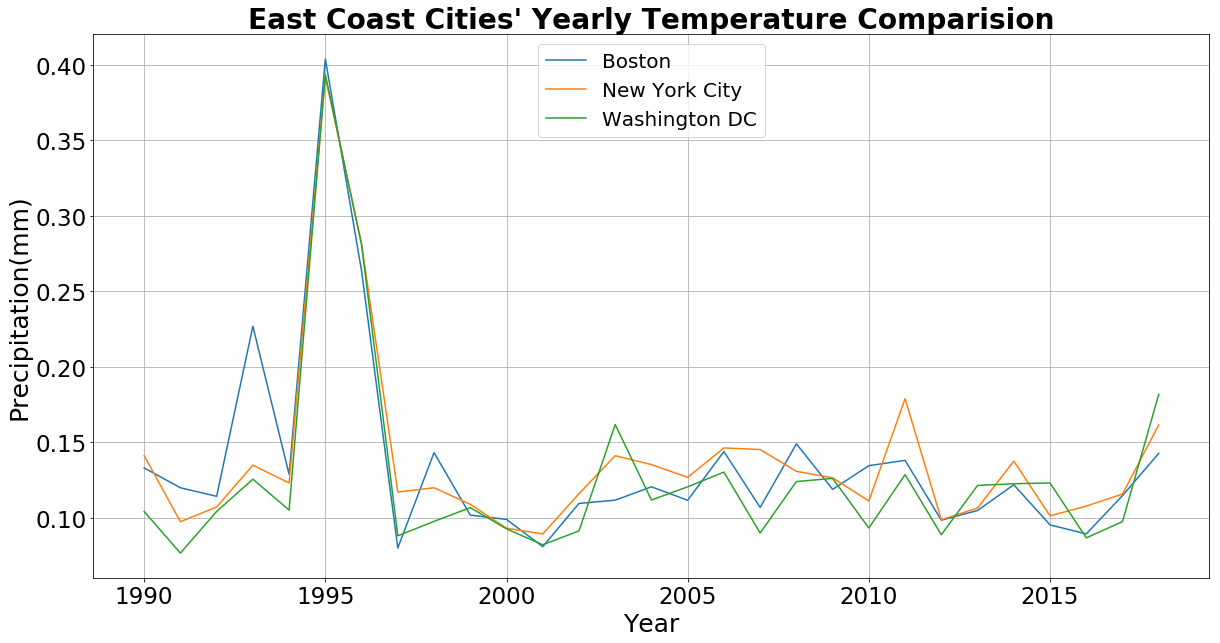

In [5]:
# East plot
plt.figure(figsize=(20,10))
for city in list(city_code_refer.values())[5:]:
    plt.plot(range(start_year, end_year+1), cities_yearly_avg_temp_dict[city])
title_str = 'East Coast Cities\' Yearly Temperature Comparision'
plt.xlabel('Year',{'size':25})
plt.ylabel('Precipitation(mm)',{'size':25})
plt.tick_params(labelsize=23)
plt.title(title_str,fontsize=28,fontweight='bold')
plt.legend(list(city_code_refer.keys())[5:],prop={'family':'Times New Roman','weight':'normal','size':20},loc='upper center')
plt.grid()
fname = 'pics/comparison/precipitation_east_plot.jpg'
plt.savefig(fname)
plt.show()

{'KSEA': [0.11408219178082192, 0.11224657534246575, 0.1116164383561644, 0.06806010928961749, 0.10123287671232878, 0.085561643835616444, 0.11263013698630137, 0.08363387978142077, 0.096630136986301379, 0.13268493150684932, 0.10673972602739729, 0.083961748633879785, 0.10528767123287673, 0.12873972602739728, 0.099726027397260289, 0.13185792349726777, 0.089205479452054801, 0.1328219178082192, 0.12282191780821917, 0.12333333333333335, 0.12956164383561647, 0.09789041095890412], 'KSFO': [0.055671232876712329, 0.088602739726027391, 0.04131506849315069, 0.049808743169398907, 0.071671232876712315, 0.053369863013698622, 0.051041095890410955, 0.051912568306010931, 0.073753424657534247, 0.057123287671232884, 0.031589041095890412, 0.041147540983606561, 0.045068493150684938, 0.065095890410958909, 0.045452054794520545, 0.058661202185792349, 0.0093150684931506914, 0.056712328767123295, 0.022821917808219183, 0.056830601092896178, 0.066356164383561636, 0.04298630136986302], 'KBUR': [0.0010410958904109589,

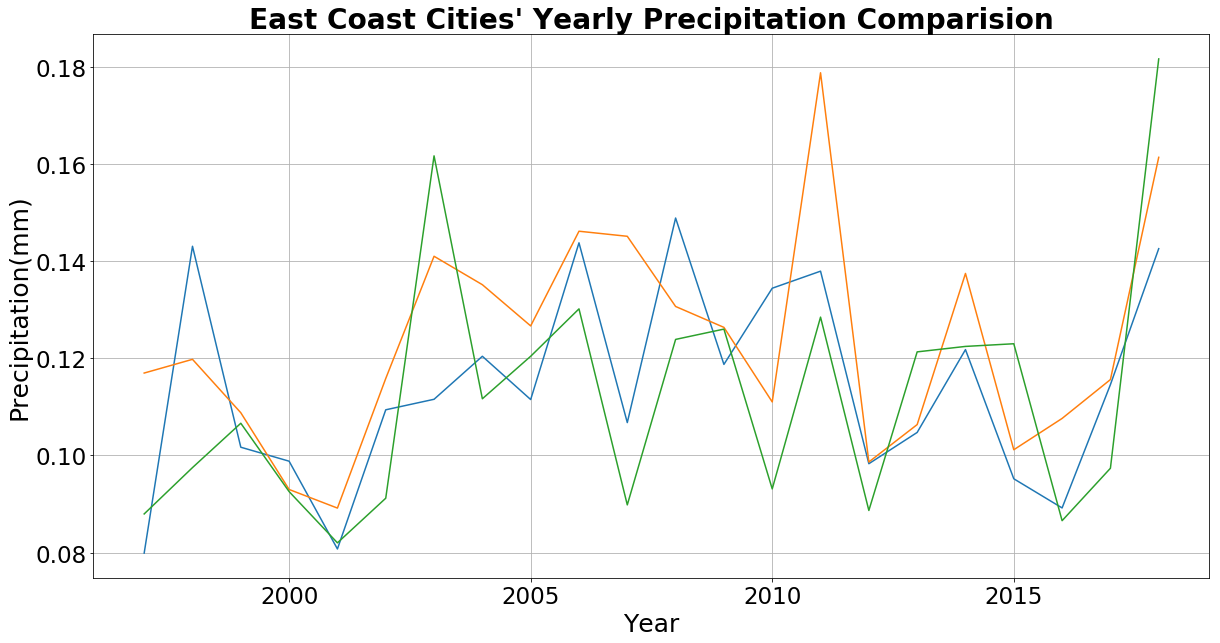

In [8]:
#East coast zoom plot
# Parameter
fname = 'pics/comparison/temperature_plot.jpg'

# Code
if not os.path.exists('pics/comparison/'):
    os.makedirs('pics/comparison/')
start_year = 1997
end_year = 2018
cities_yearly_avg_temp_dict = dict([(city,[]) for city in city_code_refer.values()])
for city in city_code_refer.values():
    for year in range(start_year, end_year + 1):
        year_start, year_end = get_yearly_start_end(year=year)
        weather_info = get_info(city,year_start, year_end, info_type='precipitation', output=False)
        cities_yearly_avg_temp_dict[city].append(weather_info['mean'])
print(cities_yearly_avg_temp_dict)
print(code_city_refer)
plt.figure(figsize=(20,10))
for city in list(city_code_refer.values())[5:]:
    plt.plot(range(start_year, end_year+1), cities_yearly_avg_temp_dict[city])
title_str = 'East Coast Cities\' Yearly Precipitation Comparision'
plt.xlabel('Year',{'size':25})
plt.ylabel('Precipitation(mm)',{'size':25})
plt.tick_params(labelsize=23)
plt.title(title_str,fontsize=28,fontweight='bold')
# plt.legend(list(city_code_refer.keys())[0:4],prop={'family':'Times New Roman','weight':'normal','size':20},loc='upper center')
plt.grid()
fname = 'pics/comparison/precipitation_east_zoom_plot.jpg'
plt.savefig(fname)
plt.show()